### **Addtional Question 3: Do combinations of sports teams and regions have a significant impact on the academic performance of student-athletes?**

C:\Users\chenk\anaconda3\Lib\site-packages\statsmodels\base\model.py:1894: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 21, but rank is 5
  warnings.warn('covariance of constraints does not have full '
C:\Users\chenk\anaconda3\Lib\site-packages\statsmodels\base\model.py:1894: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 7, but rank is 1
  warnings.warn('covariance of constraints does not have full '
C:\Users\chenk\anaconda3\Lib\site-packages\statsmodels\base\model.py:1894: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 147, but rank is 104
  warnings.warn('covariance of constraints does not have full '



ANOVA Results:
                         sum_sq     df             F    PR(>F)
C(Team)            3.466405e+00   21.0  1.158943e+00  0.328458
C(Region)          1.318830e-09    7.0  1.322797e-09  0.999971
C(Team):C(Region)  2.558370e+01  147.0  1.221935e+00  0.085808
Residual           6.708395e+01  471.0           NaN       NaN


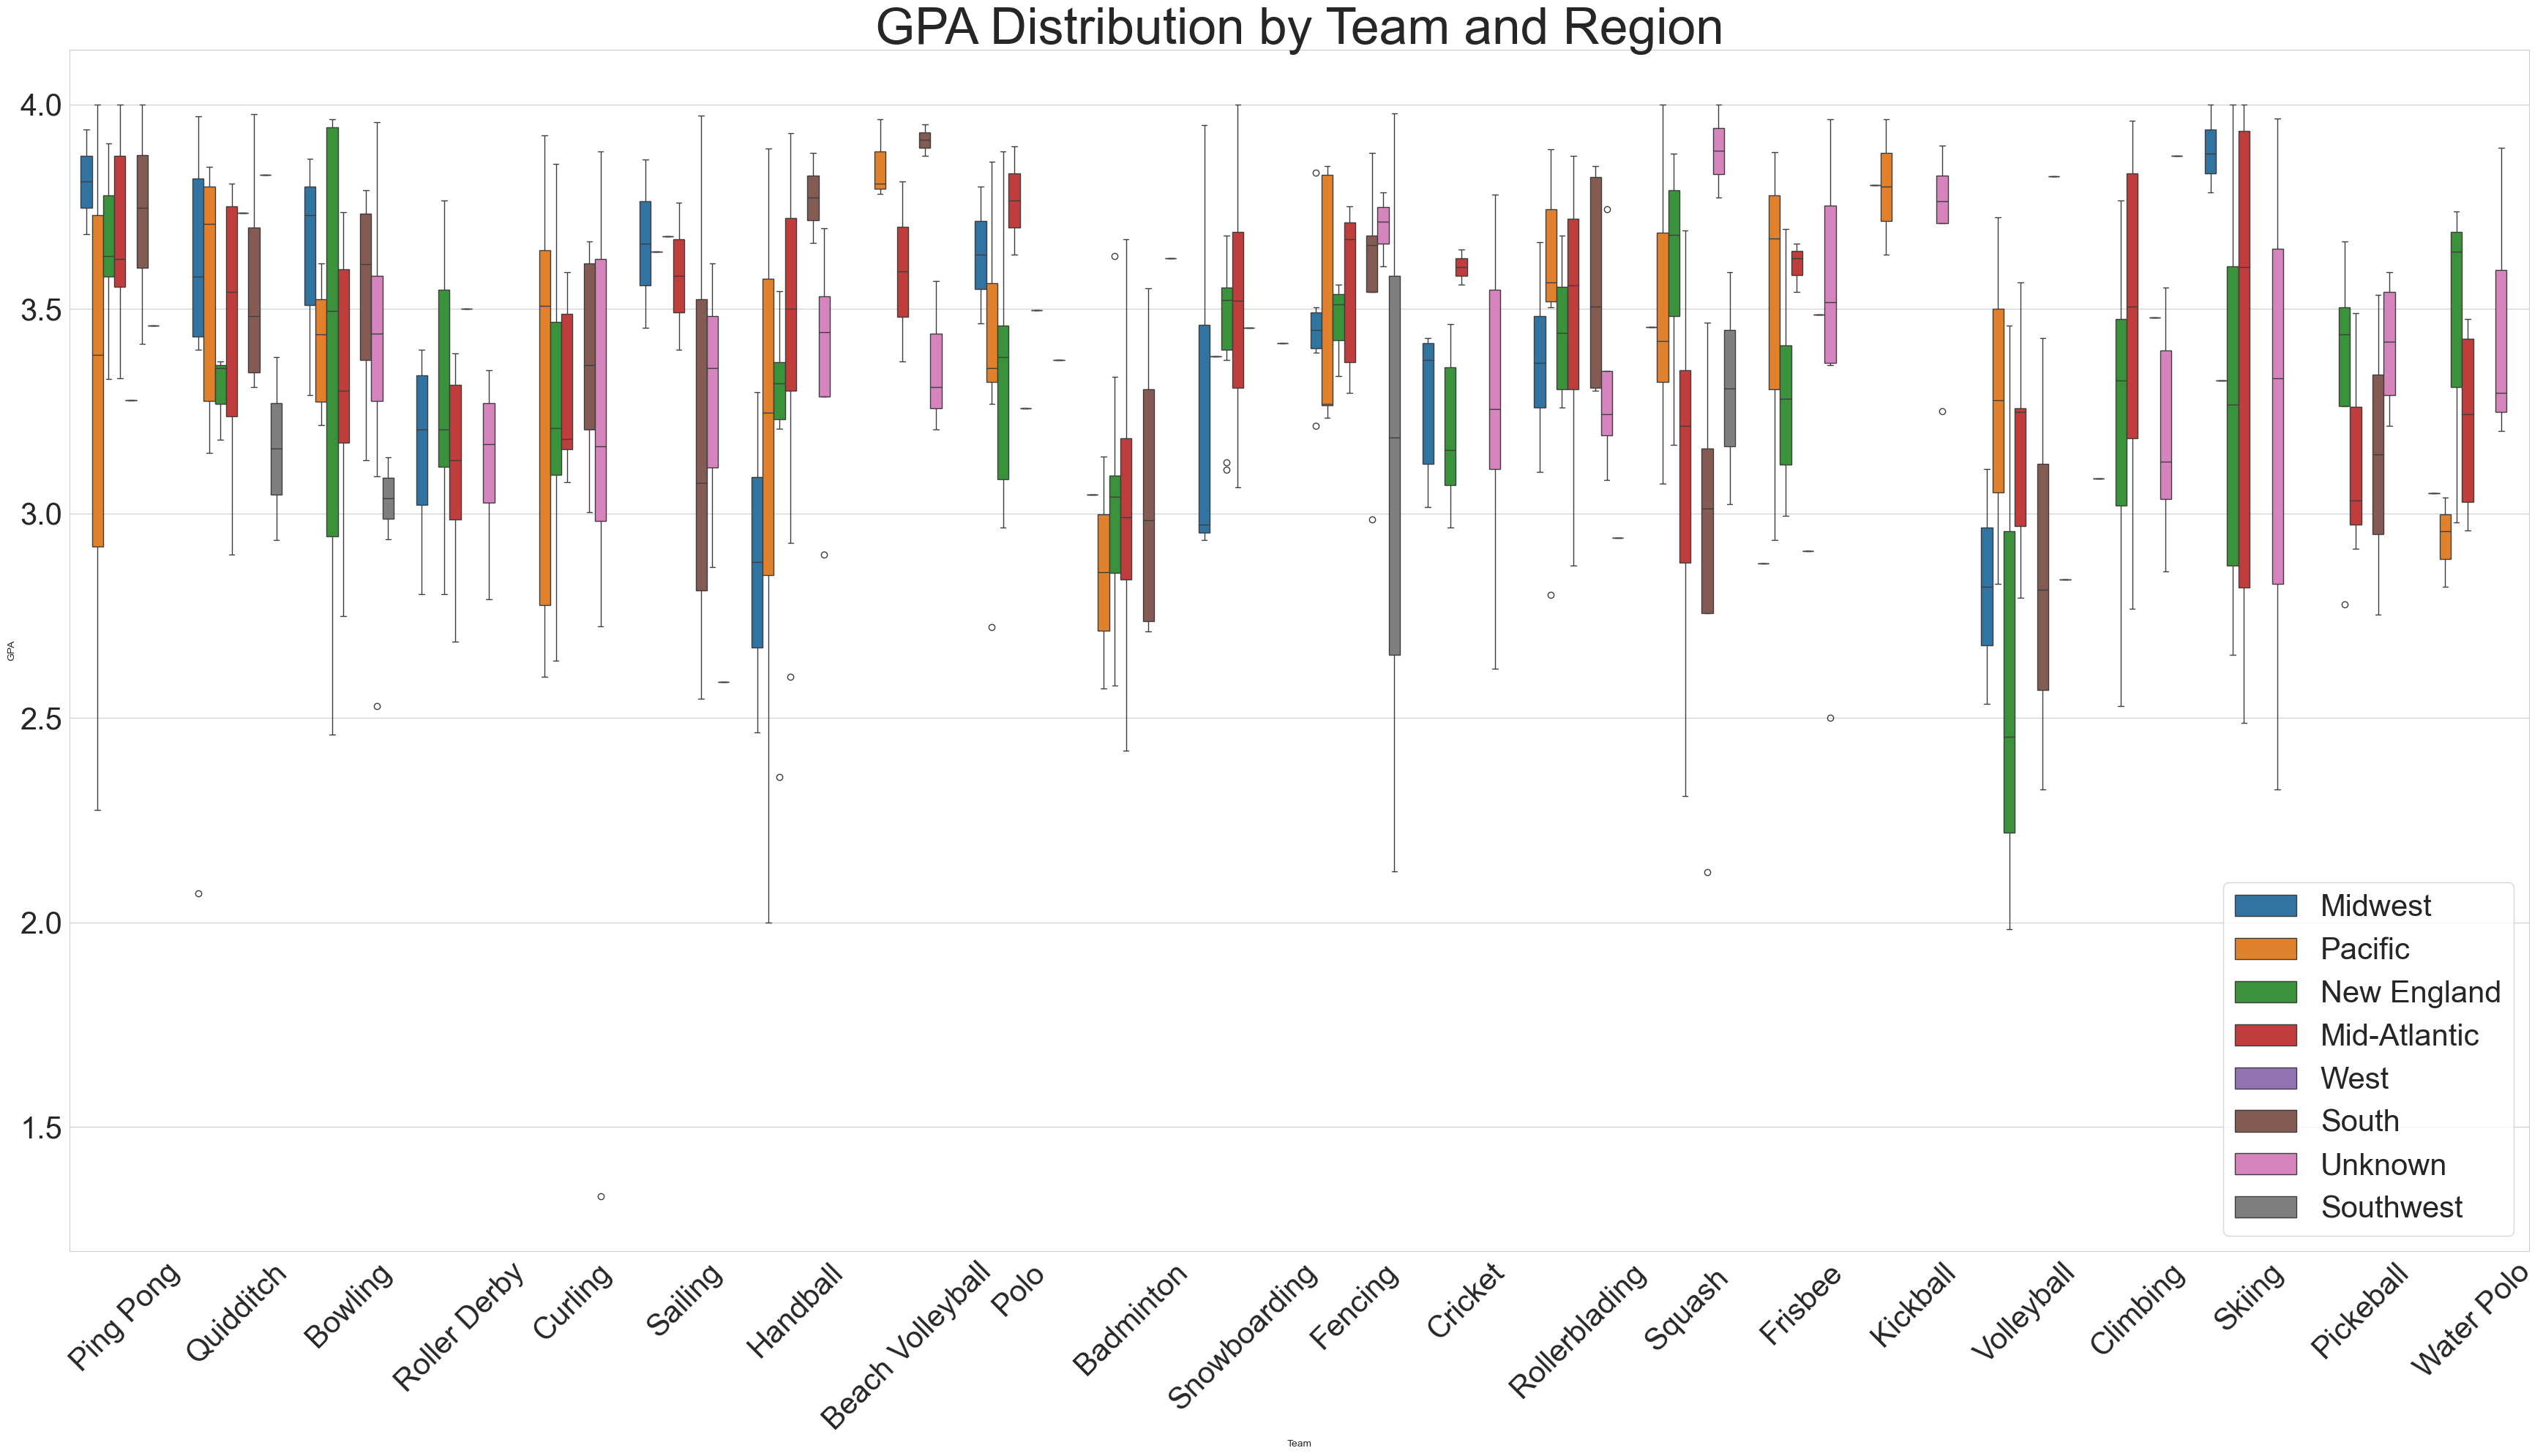


Regression Summary:
                            OLS Regression Results                            
Dep. Variable:                    GPA   R-squared:                       0.319
Model:                            OLS   Adj. R-squared:                  0.132
Method:                 Least Squares   F-statistic:                     1.708
Date:                Tue, 10 Dec 2024   Prob (F-statistic):           2.92e-05
Time:                        10:33:14   Log-Likelihood:                -193.89
No. Observations:                 601   AIC:                             647.8
Df Residuals:                     471   BIC:                             1220.
Df Model:                         129                                         
Covariance Type:            nonrobust                                         
                                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Load the data
file_path = r'C:\Users\chenk\OneDrive\桌面\BU Study\DS701\additional question\cleaned_data.csv'
data = pd.read_csv(file_path)

# Extract GPA columns
gpi_columns = [col for col in data.columns if 'GPI' in col]
gpi_data = data[gpi_columns]

# Calculate the average GPA for each student
data['Average GPA'] = gpi_data.mean(axis=1, skipna=True)

# Remove rows where Average GPA is 0 or NaN
data = data[(data['Average GPA'] != 0) & (data['Average GPA'].notna())]

# Extract relevant fields and clean the data
columns = ['Student Athletic Team 1', 'Student Home Admission Publication Region', 'Average GPA']
data_filtered = data[columns].dropna()
data_filtered.columns = ['Team', 'Region', 'GPA']

# Two-way ANOVA
model = ols('GPA ~ C(Team) + C(Region) + C(Team):C(Region)', data=data_filtered).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

# Print ANOVA results
print("\nANOVA Results:")
print(anova_table)

# Visualize GPA distribution
plt.figure(figsize=(35, 20))
sns.boxplot(x='Team', y='GPA', hue='Region', data=data_filtered)
plt.tick_params(axis='both', labelsize=30)
plt.title('GPA Distribution by Team and Region', fontsize=50)
plt.xticks(rotation=45)
plt.legend(fontsize=30, title_fontsize=35)
plt.tight_layout()

# Show the plot
plt.show()

# Regression model summary
print("\nRegression Summary:")
print(model.summary())

# Calculate the average GPA by Team and Region
grouped_data = data_filtered.groupby(['Team', 'Region'])['GPA'].mean().reset_index()

# Calculate the number of students in each Team and Region combination
counts = data_filtered.groupby(['Team', 'Region']).size().reset_index(name='Count')

# Get the three combinations with the lowest GPA and add the count of students
lowest_gpa_combinations = (
    grouped_data.sort_values(by='GPA')
    .head(3)
    .merge(counts, on=['Team', 'Region'], how='left')
)

# Get the three combinations with the highest GPA and add the count of students
highest_gpa_combinations = (
    grouped_data.sort_values(by='GPA', ascending=False)
    .head(3)
    .merge(counts, on=['Team', 'Region'], how='left')
)

# Print results
print("\nLowest GPA Combinations:")
print(lowest_gpa_combinations)

print("\nHighest GPA Combinations:")
print(highest_gpa_combinations)

# Merge GPA data with student counts
grouped_data_with_counts = grouped_data.merge(counts, on=['Team', 'Region'], how='left')

# Filter out combinations where Region is 'Unknown' or student count <= 10
filtered_data = grouped_data_with_counts[
    (grouped_data_with_counts['Count'] > 10) &
    (grouped_data_with_counts['Region'] != 'Unknown')
]

# Get the three combinations with the lowest GPA after filtering
lowest_gpa_combinations = filtered_data.sort_values(by='GPA').head(3)

# Get the three combinations with the highest GPA after filtering
highest_gpa_combinations = filtered_data.sort_values(by='GPA', ascending=False).head(3)

# Print results
print("\nLowest GPA Combinations (Count > 10):")
print(lowest_gpa_combinations)

print("\nHighest GPA Combinations (Count > 10):")
print(highest_gpa_combinations)